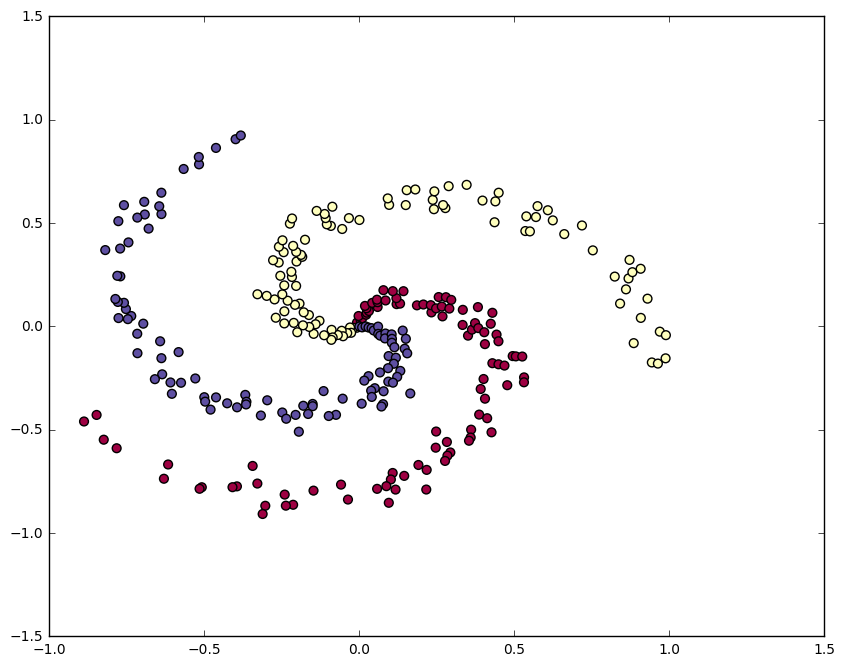

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [2]:
# split data into 80-20
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

X_test.shape
 

(60, 2)

In [8]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#For simplicity, we will not optimize this using grid search here.b#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
for i in range(300):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X_train, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration:",i, " loss:",loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration: 0  loss: 1.09779396049
iteration: 10  loss: 0.908526211761
iteration: 20  loss: 0.83960377633
iteration: 30  loss: 0.808751446125
iteration: 40  loss: 0.792922316747
iteration: 50  loss: 0.784048566565
iteration: 60  loss: 0.778764910643
iteration: 70  loss: 0.775480926705
iteration: 80  loss: 0.773374024038
iteration: 90  loss: 0.77198926582
iteration: 100  loss: 0.77106186189
iteration: 110  loss: 0.770431431911
iteration: 120  loss: 0.769997712786
iteration: 130  loss: 0.769696404773
iteration: 140  loss: 0.769485404661
iteration: 150  loss: 0.769336666857
iteration: 160  loss: 0.769231242197
iteration: 170  loss: 0.769156174678
iteration: 180  loss: 0.769102517341
iteration: 190  loss: 0.769064039727
iteration: 200  loss: 0.769036372272
iteration: 210  loss: 0.769016432091
iteration: 220  loss: 0.769002033017
iteration: 230  loss: 0.768991618075
iteration: 240  loss: 0.768984074315
iteration: 250  loss: 0.7689786037
iteration: 260  loss: 0.768974632474
iteration: 270  lo

In [9]:
# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.


scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("test accuracy:",(np.mean(predicted_class == y_test)))

test accuracy: 0.55


In [10]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class == y_train)))

train accuracy: 0.504166666667


(-1.9195589456423083, 1.9204410543576951)

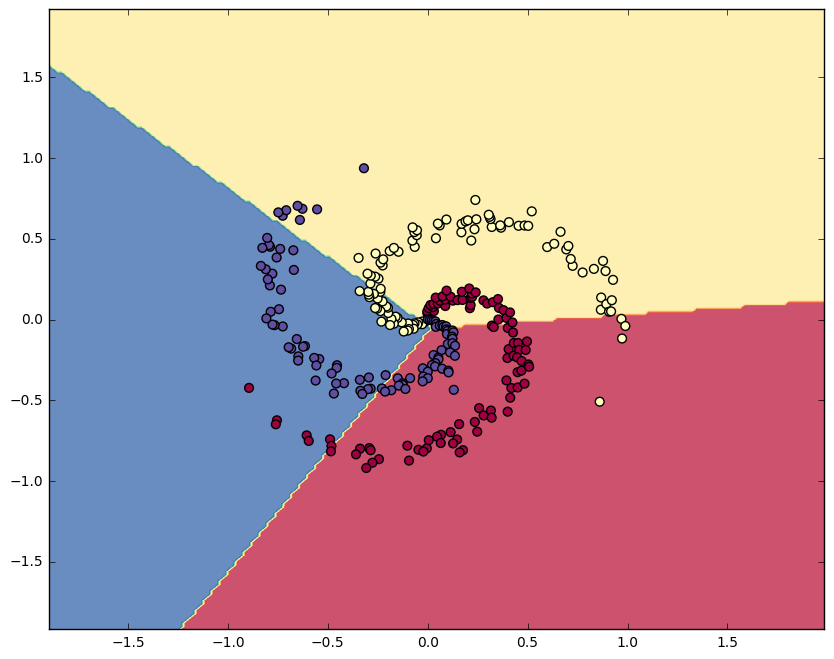

In [36]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')